<a href="https://colab.research.google.com/github/jessicacristinams/visgeo/blob/main/InfraestruturaCicloviariaPYNE2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1mzSvyk5ZQgvHUqmLfA8suncoq-0Ms1ll)

---
<center><h3></h3>
<h3><b>Visualização e Processamento de Dados Geoespaciais: Acessibilidade a Malha Cicloviária<br><h4><b>Python Nordeste 2024</b></h4></b></h3></center>


<br>Este notebook tem como objetivo apresentar de forma prática os principais métodos e conceitos sobre geoprocessamento de dados e visualização de mapas aos participantes do Python Nordeste 2024.

**Autor:** Pedro Florencio de Almeida Neto - Cientista de Dados @Ipplan
| @BioData (UFC)

**Contato:** <i>pedroflorencio@alu.ufc.br</i>

---

**Objetivo:** Calcular e visualizar o indicador PNB nos bairros de Natal-RN.

#### **1. Contextualização**

O indicador *People Near Bike Lanes* (PNB), desenvolvido pelo *Institute for Transportation and Development Policy* (ITDP), foi criado para medir a acessibilidade das infraestruturas de ciclovias e a proximidade da população a essas vias, com o objetivo de promover políticas públicas e planejamentos urbanos que incentivem o uso da bicicleta como um meio de transporte sustentável, acessível e seguro.

Neste tutorial, você aprenderá a calcular e visualizar o comportamento do indicador no seu município, permitindo assim monitorar a acessibilidade à infraestrutura em todos os bairros.

#### **2. Metodologia**

O **PNB** é definido matematicamente como a **proporção da população que vive a pelo menos 300 metros de uma infraestrutura cicloviária**, sendo um valor de varia de 0 a 1, isto é, de 0 a 100% da população.

$PNB = \frac{populacao_{proxima}}{populacao_{total}}$ [1]

Sendo:

- **populacao_proxima**: Número de pessoas em que suas habitações estão contidas em um raio de até 300 metros de infraestrutura cicloviária.
- **populacao_total**: Número total de pessoas no espaço avaliado, podendo ser bairro, município, subdistrito, entre outros.

Para **estimativa da população contida no raio de 300 metros**, utiliza-se como unidade territorial os microdados de **setores censitários** disponibilizados pelo IBGE, que correspondem a menor porção em que o território é fragmentado no Brasil e que se é possível determinar o número de habitantes. Como a infraestrutura cicloviária e seu raio podem dividir um setor censitário, é considerada uma premissa como aproximação: de que a população é distribuída de maneira uniforme em todo o espaço do setor censitário em avaliação, sendo calculada a relação de área para determinação da população dos polígonos divididos.

A **Malha Preliminar de Setores Censitários** foram adquiridas através do site do [IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/22827-censo-demografico-2022.html?edicao=39499&t=resultados), em tabelas divulgadas no dia 21/03/2024.

> **Fontes dos dados:**
- Limites dos bairros de Natal | [Address For All](https://www.addressforall.org/en/downloads/#Brazil)
- Infraestrutura cicloviária de Natal | [Google My Maps](https://www.google.com/maps/d/u/0/viewer?mid=1x474AeGEWUAAcvDTgS_fxg-J0Hg&femb=1&ll=-5.840903345747478%2C-35.22957610949073&z=12)
- População dos setores censitários | [IBGE](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Agregados_por_Setores_Censitarios_preliminares/agregados_por_setores_csv/UF/#:~:text=14M-,Agregados_preliminar..%3E,-2024%2D03%2D20)
- Malha de setores censitários | [IBGE](https://www.ibge.gov.br/geociencias/downloads-geociencias.html?caminho=organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/censo_2022_preliminar/setores/gpkg/UF)

#### **3. Bibliotecas**

In [ ]:
!pip install -q mapclassify
!pip3 install -q contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 50.8 MB/s eta 0:00:00


In [ ]:
# importe as bibliotecas necessarias


#### **4. Aquisição dos Dados**

**Instruções:**

1. Solicitar acesso à pasta **[PyNE](https://drive.google.com/drive/folders/1Ac-fpV8r78gc6IKm8JfORZNNZJegiKSt?usp=drive_link)**;
2. Clicar com o botão direito e criar um **atalho** para Meu Drive | *My Drive*.

In [ ]:
# realize a aquisicao dos datasets da pasta dados_brutos


**Sugestão de nomes de variáveis:**

- `gdf_bairros`: GeoDataframe dos bairros de Natal.
- `df_setores`: DataFrame dos setores censitarios do Rio Grande do Norte.
- `gdf_setores`: GeoDataFrame da malha de setores censitarios do Rio Grande do Norte.
- `gdf_infraestrutura`: GeoDataFrame do mapa cicloviário de Natal.




#### **5. Entendimento dos Dados**

##### **5.1. Setores Censitários**

In [ ]:
# verifique as 5 primeiras linhas de df_setores


In [ ]:
# verifique as informacoes de df_setores


**Dicionário de Dados - Setores Censitários**

| Variável        | Tipo      | Tamanho | Descrição                                                             |
|-----------------|-----------|---------|-----------------------------------------------------------------------|
| CD_SETOR        | texto     | 16      | Geocódigo de Setor Censitário                                        |
| AREA_KM2        | real      |         | Área do Setor Censitário em quilômetros quadrados                    |
| CD_REGIAO       | numérico  | 1       | Código das Grandes Regiões (Regiões Geográficas)                      |
| NM_REGIAO       | texto     | 15      | Nome das Grandes Regiões (Regiões Geográficas)                        |
| CD_UF           | numérico  | 2       | Código da Unidade da Federação                                        |
| NM_UF           | texto     | 20      | Nome da Unidade da Federação                                          |
| CD_MUN          | numérico  | 7       | Código do município                                                   |
| NM_MUN          | texto     | 50      | Nome do município                                                     |
| CD_DIST         | numérico  | 9       | Código do distrito                                                    |
| NM_DIST         | texto     | 50      | Nome do distrito                                                      |
| CD_SUBDIS       | numérico  | 11      | Código do subdistrito                                                  |
| NM_SUBDIST      | texto     | 50      | Nome do subdistrito                                                    |
| CD_MICRO        | numérico  | 5       | Código da microrregião                                                 |
| NM_MICRO        | texto     | 50      | Nome da microrregião                                                   |
| CD_MESO         | numérico  | 4       | Código da mesorregião                                                  |
| NM_MESO         | texto     | 50      | Nome da mesorregião                                                    |
| CD_RGI          | numérico  | 6       | Código da região geográfica imediata                                   |
| NM_RGI          | texto     | 50      | Nome da região geográfica imediata                                     |
| CD_RGINT        | numérico  | 4       | Código da região geográfica intermediária                             |
| NM_RGINT        | texto     | 50      | Nome da região geográfica intermediária                               |
| CD_CONCURB      | numérico  | 7       | Código da Concentração Urbana                                          |
| NM_CONCURB      | texto     | 50      | Nome da Concentração Urbana                                            |
| V0001           | numérico  |         | Total de pessoas                                                       |
| V0002           | numérico  |         | Total de Domicílios (DPPO + DPPV + DPPUO + DPIO + DCCM + DCSM)        |
| V0003           | numérico  |         | Total de Domicílios Particulares (DPPO + DPPV + DPPUO + DPIO)          |
| V0004           | numérico  |         | Total de Domicílios Coletivos (DCCM + DCSM)                            |
| V0005           | real      |         | Média de moradores em Domicílios Particulares Ocupados (Total pessoas em Domicílios Particulares Ocupados / DPPO + DPIO)     |
| V0006           | real      |         | Percentual de Domicílios Particulares Ocupados Imputados (Total DPO imputados / Total DPO) |
| V0007           | numérico  |         | Total de Domicílios Particulares Ocupados (DPPO + DPIO)                |


##### **5.2. Limites dos bairros de Natal**

In [ ]:
# verifique as 5 primeiras linhas de gdf_bairros


In [ ]:
# verifique as informacoes de gdf_bairros


##### **5.3. Malha georreferenciada de setores censitários**

In [ ]:
# verifique as 5 primeiras linhas de gdf_setores


In [ ]:
# verifique as informacoes de gdf_setores


##### **5.4. Infraestrutura cicloviária**

In [ ]:
# verifique as 5 primeiras linhas de gdf_infraestrutura


In [ ]:
# verifique as informacoes de gdf_infraestrutura


In [ ]:
# verifique os sistema de referencia de coordenadas de gdf_infraestrutura


#### **6. Pré-Processamento dos Dados**

Devem ser empreendidas as seguintes etapas no processamento dos dados:
1. Filtro de colunas;
2. Correção dos nomes das colunas;
3. Substituição dos nomes das variáveis;
4. Seleção de linhas;
5. Adição de dados.

##### **6.1. Seleção de colunas** | *gdf_bairros*

In [ ]:
# selecione as colunas 'N_','BAIRRO','geometry' em gdf_bairros


##### **6.2. Substituição dos nomes das colunas** | *gdf_bairros*

In [ ]:
# troque os nomes BAIRRO e N_ para bairro e id, respectivamente


##### **6.3. Conversão dos tipos das variáveis** | *gdf_bairros*

In [ ]:
# converta o tipo da variavel id em gdf_bairros para int32


**Resultado:**

In [ ]:
# mostre as 5 primeiras linhas de gdf_bairros
# o resultado deve ser semelhante ao apresentado abaixo


,id,bairro,geometry
0,9,Rocas,"POLYGON ((256848.065 9361403.003, 256791.200 9..."
1,11,Praia do Meio,"POLYGON ((257073.088 9361374.537, 257074.693 9..."
2,34,Neópolis,"POLYGON ((256774.934 9350774.711, 256732.016 9..."
3,35,Capim Macio,"POLYGON ((256758.629 9353564.405, 256880.038 9..."
4,26,Nova Descoberta,"POLYGON ((257075.549 9355457.924, 257105.533 9..."


##### **6.4. Filtro do município de Natal** | *df_setores*

Código IBGE de Natal: **2408102**

In [ ]:
# selecione as linhas de 'df_setores' cujo codigo IBGE seja o de Natal
# atribua o nome 'df_setores_natal' a este novo DataFrame


In [ ]:
# verifique se df_setores_natal tem 1116 linhas atraves do metodo .info()


##### **6.5. Seleção de colunas** | *df_setores_natal*

In [ ]:
# selecione as colunas 'CD_SETOR','AREA_KM2','v0001' de df_setores_natal


##### **6.6. Substituição dos nomes das colunas** | *df_setores_natal*

In [ ]:
# troque o nome da coluna v0001 para POPULACAO em df_setores_natal


**Resultado:**

In [ ]:
# verifique as 5 primeiras linhas de df_setores natal. O resultado deve ser semelhante ao dataframe abaixo


,CD_SETOR,AREA_KM2,POPULACAO
3151,240810205060001P,0.086294,506
3152,240810205060002P,0.104618,854
3153,240810205060003P,0.098724,918
3154,240810205060004P,0.089994,1008
3155,240810205060005P,0.074237,920


##### **6.7. Adição da geometria dos setores censitários** | *df_setores_natal*

In [ ]:
# 1. Adicione a df_setores_natal a coluna referente a geometria (geometry)
# 2. Lembre-se que esta coluna esta em gdf_setores
# 3. A chave para juncao é 'CD_SETOR'
# 4. Atribua o nome gdf_setores_natal ao DataFrame final


##### **6.8. Transformação para GeoDataFrame** | *gdf_setores_natal*

In [ ]:
gdf_setores_natal = gpd.GeoDataFrame(gdf_setores_natal, geometry='geometry', crs='EPSG:4326')

**Resultado:**

In [ ]:
# verifique as 5 primeiras linhas de gdf_setores_natal e observe se obteve o mesmo resultado

,CD_SETOR,AREA_KM2,POPULACAO,geometry
0,240810205060001P,0.086294,506,"POLYGON ((-35.25024 -5.75220, -35.25006 -5.752..."
1,240810205060002P,0.104618,854,"POLYGON ((-35.25041 -5.74773, -35.25036 -5.747..."
2,240810205060003P,0.098724,918,"POLYGON ((-35.25305 -5.74715, -35.25338 -5.747..."
3,240810205060004P,0.089994,1008,"POLYGON ((-35.25130 -5.74646, -35.25106 -5.746..."
4,240810205060005P,0.074237,920,"POLYGON ((-35.25220 -5.74283, -35.25184 -5.743..."


#### **7. Análise Exploratória dos Dados (E.D.A.)**

##### **7.1. Qual a distribuição geográfica dos bairros de Natal?**

In [ ]:
# plote os limites dos bairros de Natal usando Matplotlib


##### **7.2. Qual a distribuição geográfica dos setores censitários em Natal?**

In [ ]:
# plote os setores censitarios de Natal usando Matplotlib


##### **7.3. Qual a distribuição geográfica da infraestrutura cicloviária em Natal?**

In [ ]:
# plote a infraestrutura cicloviaria de Natal usando Matplotlib


Natal conta atualmente com a seguinte infraestrutura:
- 72,72 km (município)
- 31,31 km (outros órgãos)

**Total:** 104,04 km

##### **7.4. Qual o percentual da população de Natal que habita a pelo menos 300m de infraestrutura cicloviária?**

######**7.4.1. Buffer de 300m da infraestrutura cicloviária**

In [ ]:
# filtro das colunas de gdf_infraestrutura

# definindo sistema de coordenadas que represente a infraestrutura em um sistema cartesiano

# realizando buffer de 300m

# retornando ao sistema de coordenadas padrao

Para mais informações sobre a transformação de um sistema de coordenadas geográficas para projetadas (sistema cartesiano), acesse este [link](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/geographic-vs-projected-coordinate-reference-systems-python/).

In [ ]:
# visualize se o buffer deu certo ;)


###### **7.4.2. Interseção da infraestrutura com os setores**

In [ ]:
# visualize o buffer e os setores censitarios


Transformação dos polígonos de infraestrutura cicloviária dilatados em um polígono único, de geometria *MultiPolygon*, para não haver sobreposição de polígonos no cálculo do indicador.

In [ ]:
# transformacao para DataFrame para substituir nome de coluna

# substituicao do nome da coluna

# transformando para GeoDataframe

# conversao da infraestrutura cicloviaria em um poligono unico


**Resultado:**

In [ ]:
# recorte as areas dos setores censitarios em interseccao com a infraestrutura cicloviaria (metodo overlay)


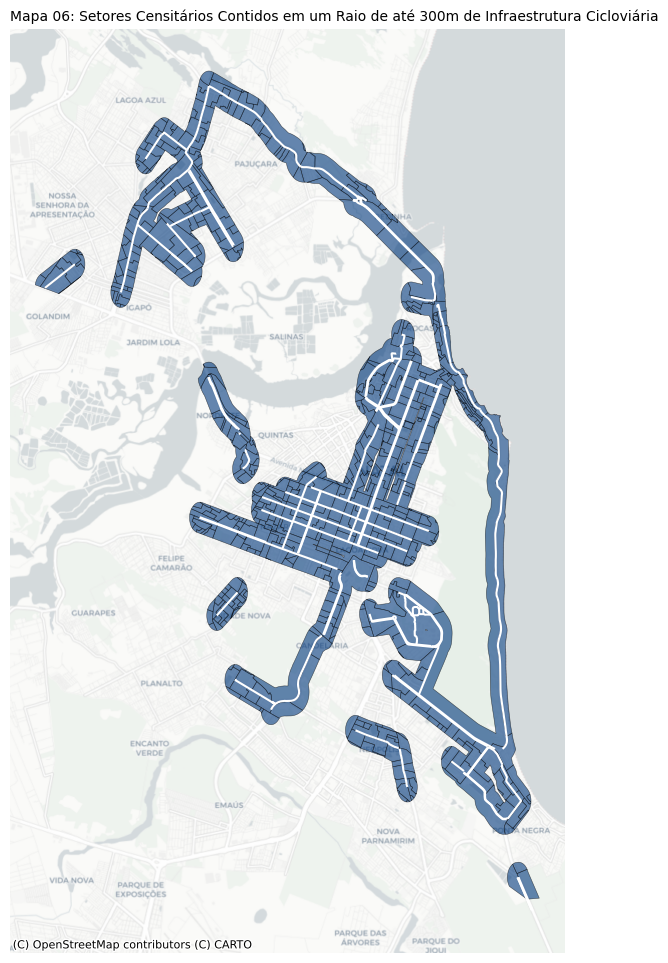

In [ ]:
# visualize os poligonos intersecionados


###### **7.4.3. Cálculo do proporcional população por área de setor censitário intersecionado**

In [ ]:
# defina um sistema de coordenadas que represente os setores em um plano cartesiano


In [ ]:
# adicione uma coluna chamada 'AREA_INTERSECAO' referente a area dos setores intersecionados


In [ ]:
# adicione a area dos setores completos


In [ ]:
# junte os DataFrames de setores completos e intersecionados


In [ ]:
# renomeie as colunas


In [ ]:
# exclua colunas desnecessarias


In [ ]:
# calcule os proporcionais das areas que estao intersecionadas


In [ ]:
# calcule a populacao proporcional nas areas intersecionadas


**Resultado:**

In [ ]:
# verifique as 5 ultimas linhas do dataframe formado


**Nota:** A escolha do **Left Join** foi feita para garantir que, mesmo que não haja setores censitários que se sobreponham à infraestrutura cicloviária, eles ainda apareçam no dataframe resultante.

In [ ]:
# preencha NaN com zero


###### **7.4.4. People Near Bike Lanes (PNB)**

Total da população de Natal que está a pelo menos 300m de infraestrutura cicloviária.

##### **7.5. Qual o percentual da população por bairro que habita a pelo menos 300m de infraestrutura cicloviária em Natal?**

In [ ]:
# crie uma coluna de ponto representativo para cada setor censitario


In [ ]:
# crie um GeoDataFrame a partir da geometria dos pontos representativos


In [ ]:
# conversao de sistema de referencia de coordenadas


**Resultado:**

###### **7.5.1. Adicionando bairros aos setores censitários**

In [ ]:
# padronize sistema de referencia de coordenadas de gdf_bairros e o gdf anterior


In [ ]:
# implemente spatial join para adicionar geometria de bairros


In [ ]:
# remova colunas desnecessarias


In [ ]:
# adicione coluna de bairros no dataframe de intersecao a partir dos setores completos


In [ ]:
# renomeie a coluna do dataframe de intersecao de bairro para BAIRRO


**Resultado:**

In [ ]:
# calcule a populacao por bairro


In [ ]:
# agrupamento por bairro dos setores censitários intersecionados


In [ ]:
# adequacao do dataframe de agrupamento


###### **7.5.2. Cálculo do PNB por bairro de Natal**

In [ ]:
# calcule o PNB por bairro


In [ ]:
# salve em um arquivo CSV


In [ ]:
# adicione a geometria dos bairros para visualizacao do mapa coropletico


###### **7.5.3. Mapa Coroplético da Distribuição do Indicador PNB por Bairro**

In [ ]:
quantis=5
titulo_do_mapa = 'Figura 06: Distribuição do Percentual de Pessoas que Vivem Até 300m de Infraestrutura Cicloviária em Natal'
resolucao_dpi = 'figure'
tamanho_do_mapa = (12,12)
colors = ['#CCE6FF', '#A0CAFF', '#75AEFF', '#4A92FF', '#1E77FF', '#005BC9', '#004BA6', '#00387D', '#002654', '#00132B']
paleta_coropletico = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
missing = {'color':'darkgrey',
            'edgecolor':'grey',
            'label':'Sem informações'}


In [ ]:
# criando figura base
fig, ax = plt.subplots(figsize=tamanho_do_mapa)

# criando camada de limites dos bairros
gdf_bairros.boundary.plot(ax=ax, color='white', linewidth=.2, alpha=.8)

# camada do mapa coropletico
gdf_group_intersection.plot(ax = ax,
                            scheme = 'quantiles',
                            column = 'PNB',
                            k = quantis,
                            lw = .6,
                            edgecolor='white',
                            cmap = paleta_coropletico,
                            legend = True)

plt.title(titulo_do_mapa, loc='left', fontsize=10)

plt.axis('off')

cx.add_basemap(ax=ax, crs=gdf_bairros.crs, zoom=13, source='CartoDB positron')

# salvando no formato PNG
plt.savefig(fname='MapaCoropleticoPNB.png',
            dpi=600,
            format='png',
            bbox_inches='tight')

plt.show()

#### **8. Visualizações Interativas**

##### **8.1. Mapa Coroplético do PNB (Folium)**

#### **Extra**

**Histograma do PNB nos bairros de Natal**

In [ ]:
# metadados do histograma do indicador PNB
df = gdf_group_intersection
indicator = 'PNB'
bins=5
min = df[indicator].min()
max = df[indicator].max()

# histograma
histogram = np.histogram(df[indicator], range=(min,max), bins=bins)

# dataframe contendo os intervalos e contagem de bairros
df_histogram = pd.DataFrame()
df_histogram['limiar'] = histogram[1][1:]
df_histogram['count_bairros'] = histogram[0]
df_histogram['limiar'] = round(df_histogram['limiar'],2)

In [ ]:
df_histogram

,limiar,count_bairros
0,0.20,8
1,0.39,10
2,0.59,4
3,0.79,4
4,0.98,11


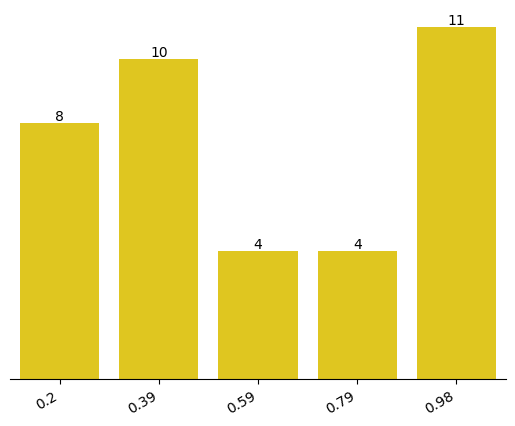

In [ ]:
ax = sns.barplot(data=df_histogram,
                 x='limiar',
                 y='count_bairros',
                 color='#ffdd00')

ax.bar_label(ax.containers[0], fontsize=10);

# removendo linhas de eixos
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.yaxis.set_visible(False)

# removendo label do eixo x
ax.set_xlabel('')

ax.set_xticks(np.arange(len(df_histogram['limiar'])))
ax.set_xticklabels(df_histogram['limiar'], rotation=30, ha='right')

plt.show()

In [ ]:
df_histogram.to_csv('202404_HistogramaProximidadeCiclo.csv',
                    encoding='utf-8',
                    index=False)

**Cálculo da assimetria, média e mediana**

* O cálculo da assimetria da distribuição leva em consideração o coeficiente de assimetria entre os percentis 10 e 90 multiplicado por 100:

$$
A_P = (-1)*\frac{ P_{90} - 2M_d + P_{10} }{ P_{90} - P_{10} } × 100
$$

Onde:

$P_{10} =$ 10º percentil da amostra

$P_{90} =$ 90º percentil da amostra

$M_d =$ 50º percentil da amostra (valor mediano)


 * O coeficiente de assimetria entre os percentis 10 e 90 multiplicado por 100 assume valores na faixa:  $ -100 \le A_p \le +100 $

 * A interpretação do valor é:

\begin{cases}
    Se\ A_{p} > 0 & \text{Valores concentrados na direita da distribuição}\\
    Se\ A_{p} = 0 & \text{Valores concentrados no centro da distribuição}\\
    Se\ A_{p} < 0 & \text{Valores concentrados na esquerda da distribuição}\\
\end{cases}

* O valor absoluto do coeficiente indica a intensidade da assimetria.

In [ ]:
# função que retorna o coeficiente quartil de assimetria
def coeficiente_quartil_assimetria(a:'pd.core.series.Series'):
    p10 = a.quantile(.1)
    md = a.quantile(.5)
    p90 = a.quantile(.9)
    skew = (-1)*((p90 + p10 - (2*md)) / (p90 - p10)) * 100

    return skew

In [ ]:
coeficiente_quartil_assimetria(df['PNB'])

-18.69760461797492

In [ ]:
mediana = df['PNB'].median()
mediana

0.4451403009353396

In [ ]:
media = df['PNB'].mean()
media

0.492898085792679

**Obrigado!** 🌞